## Сорокин Вадим, 828


# Лабораторная работа 7.1. 
Исследование углового распределения интенсивности космических лучей на уровне моря



In [1]:
import numpy as np
import scipy as sp
import scipy.optimize
import pandas as pd 
import matplotlib.pyplot as plt


### Цель работы:
Определить $n$ для зависимости $I(\theta) = I_0 \cos^n (\theta)$ интенсивности космического излучения от угла $\theta$ с вертикалью


### Оборудование: 
Телескоп из двух сцинтилляционных счетчиков, высоковольтный выпрямитель для питания счетчиков, усилители-формирователи импульсов, схема совпадения, счетчик импульсов.

### Теоретическая справка
Космические лучи - это потоки частиц различной природы, зародившиеся в просторах Вселенной и изотропно падающих на поверхность земной атмосферы(первичное излучение), а также потоки частиц, образованных в результате поглощения первичного излучения в атмосфере Земли (вторичное излучение). Энергия отдельных ядер атомов космического излучения может достигать 20 Дж. Вторичное космическое излучение состоит из адронов (переносчики сильного взаимодействия: пионы, протоны, нейтроны и др.), а также из лептонов (электронов, мюонов, нейтрино) и $\gamma$-квантов, возникающих при распадах нестабильных вторичных частиц и в электронно-фотонных лавинах в атмосфере. Вторичные $\pi \pm$ -мезоны распадаются по схеме

\begin{equation}
\pi^{+} \rightarrow \mu^{+} + \nu_{\mu}
\end{equation}

\begin{equation}
\pi^{-} \rightarrow \mu^{-} +\tilde{ \nu_{\mu}}
\end{equation}



## Ход работы

### Измерение числа случайных совпадений 

Учтём фоновые события, когда счетчики телескопа срабатывают не от частиц, а от ливней частиц космических лучей. Определим скорость счета ливней, измерив число двойных совпадений импульсов при горизотиальном положении телескопа. Время измерения: 9 мин.

In [56]:
N1 = 44749 / 9 
N2 = 53692 / 9

Проведем измерение фона, обусловленного широкими атмосферными ливнями:

In [57]:
N_b = 50 

### Зависимость от угла 

Определим скорость счета двойных совпадений $I(\theta)$ для различных положений телескопа с различными углами $\theta$ к вертикали.

In [58]:
I = np.array([486, 368, 311, 149, 109, 93, 64])
theta = np.array([0, 15, 30, 48, 60, 70, 80])


In [59]:
df = pd.DataFrame({
    "$\theta$": theta,
    "$\text{I(} \theta \text{)}$": I,
    "$\text{I(} \theta \text{) - }I_b$": I - N_b,
    "$\text{ln} \cos(\theta)$": np.log(np.cos(np.radians(theta))),
    "$\text{ln} ( \text{I(} \theta \text{) - }I_b )/I_0$": np.log((I - N_b)/436)
    }
)

Занесем данные в таблицу, учтем также фоновые события:

In [60]:
df

,$\theta$,$\text{I(} \theta \text{)}$,$\text{I(} \theta \text{) - }I_b$,$\text{ln} \cos(\theta)$,$\text{ln} ( \text{I(} \theta \text{) - }I_b )/I_0$
0,0,486,436,0.000000,0.000000
1,15,368,318,-0.034668,-0.315591
2,30,311,261,-0.143841,-0.513122
3,48,149,99,-0.401776,-1.482522
4,60,109,59,-0.693147,-2.000105
5,70,93,43,-1.072886,-2.316442
6,80,64,14,-1.750724,-3.438585


Рассчитаем коэффициент наклона прямой по МНК, найдем погрешности:

In [61]:
y, x = df["$\text{ln} ( \text{I(} \theta \text{) - }I_b )/I_0$"], df["$\text{ln} \cos(\theta)$"]



In [62]:
def f(x, k, b):
    return k * x + b

popt, pcov = sp.optimize.curve_fit(f, x, y)
perr = np.sqrt(np.diag(pcov))


In [63]:
k, b = popt
sigma_k, sigma_b = perr


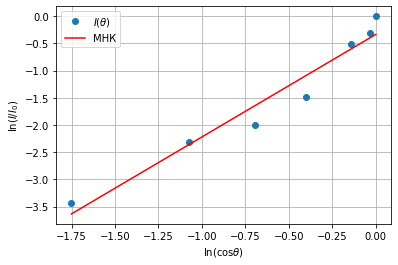

In [64]:
fig = plt.figure()

ax = fig.add_subplot()
plt.plot(x, y, 'o', label='$I( θ )$')

plt.plot(x, k * x + b, 'r', label='МНК')
plt.grid(True)
plt.xlabel('$ \ln (\cos θ)$')
plt.ylabel('$\ln (I/I_0)$')
plt.legend()


Коэффициент наклона:

In [65]:
k

1.8857508473918805

Погрешность k:

In [66]:
sigma_k

0.1902432721776045

Итоговое значение степени n в зависимости $I(\theta) = I_0 \cos^n (\theta)$:

\begin{equation}
n = 1.89 \pm 0.19
\end{equation}

### Роль случайных совпадений

Оценим роль случайных совпадений при измерениях $I(\theta)$. Случайные совпадения определяются по формуле:

\begin{equation}
N_{сл} = 2\tau_{раз} N_1 N_2
\end{equation}

где $N_1$, $N_2$ - числа импульсов в единицу времени от каждого счетчика, т.е. скорость счета в каждом канале, $\tau_{раз}$ - разрешающее время схемы совпадения. Примем $\tau_{раз}$ за $10^{-7} с$:



In [70]:

tau = 1e-7
N = 2 * tau * N1 * N2 / 3600
N

0.0016479172208504799

$N_{сл}$ = {{N}}

Можно сделать вывод о том, что случайные совпадения практически не вносят погрешность в результат эксперимента.